<a href="https://colab.research.google.com/github/jalammar/ecco/blob/main/notebooks/Ecco_Comparing_Token_Rankings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install ecco

In [2]:
import ecco
# lm = ecco.from_pretrained('distilgpt2', gpu=False, activations=True, attention=True, hidden_states=True)

In [3]:
hf_model_id = 'mistralai/Mistral-7B-v0.1'

model_config = {
    'embedding': "model.embed_tokens",
    'type': 'causal',
    'activations': ['mlp\.down_proj'], #This is a regex
    'token_prefix': '▁',
    'partial_token_prefix': ''
}
lm = ecco.from_pretrained(hf_model_id, 
                                  activations=True, attention=True, hidden_states=True,
                                  model_config=model_config, gpu=False)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [4]:
text= "The keys to the cabinet"
output = lm.generate(text, generate=15, do_sample=False)

<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
MistralModel is using MistralSdpaAttention, but `torch.nn.functional.scaled_dot_product_attention` does not support `output_attentions=True`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
output.output_text

'<s> The keys to the cabinet of the Ministry of Foreign Affairs of the Republic of Moldova were handed'

In [6]:
input_tokenized_info = lm.tokenizer(text, return_tensors="pt")
input_ids, attention_mask = (
    input_tokenized_info["input_ids"],
    input_tokenized_info["attention_mask"],
)


tensor([[    1,   415,  8148,   298,   272, 18266]])

In [18]:
input_ids.numpy()[0]

array([    1,   415,  8148,   298,   272, 18266])

In [15]:
output.tokens[0]

['<s>',
 '▁The',
 '▁keys',
 '▁to',
 '▁the',
 '▁cabinet',
 '▁of',
 '▁the',
 '▁Ministry',
 '▁of',
 '▁Foreign',
 '▁Affairs',
 '▁of',
 '▁the',
 '▁Republic',
 '▁of',
 '▁M',
 'old',
 'ova',
 '▁were',
 '▁handed']

In [19]:
for x, y in zip(input_ids.numpy()[0], output.tokens[0]):
    print(x, y)

1 <s>
415 ▁The
8148 ▁keys
298 ▁to
272 ▁the
18266 ▁cabinet


In [10]:
input_ids.shape

torch.Size([6])

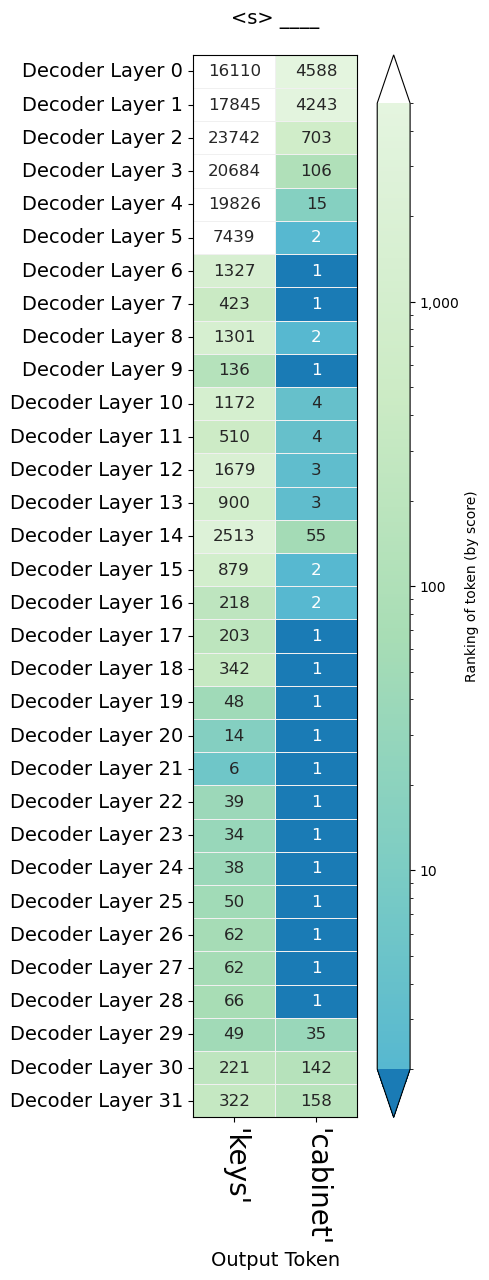

In [20]:
output.rankings_watch(watch=[8148, 18266], position=6)

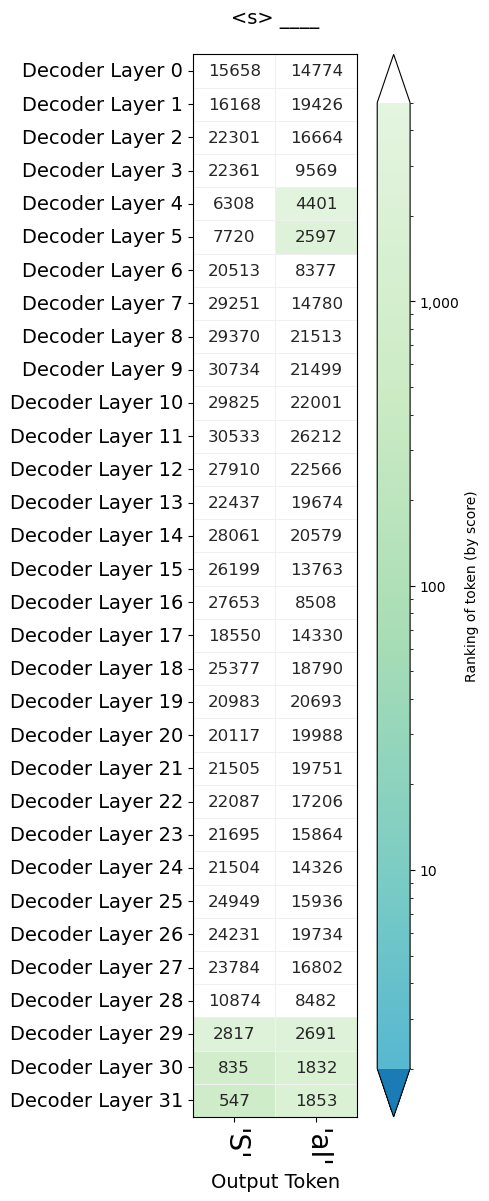

In [7]:
output.rankings_watch(watch=[318, 389], position=6)

In [8]:
text= "The key to the cabinets"
output2 = lm.generate(text, generate=1, do_sample=False)


<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


<IPython.core.display.Javascript object>

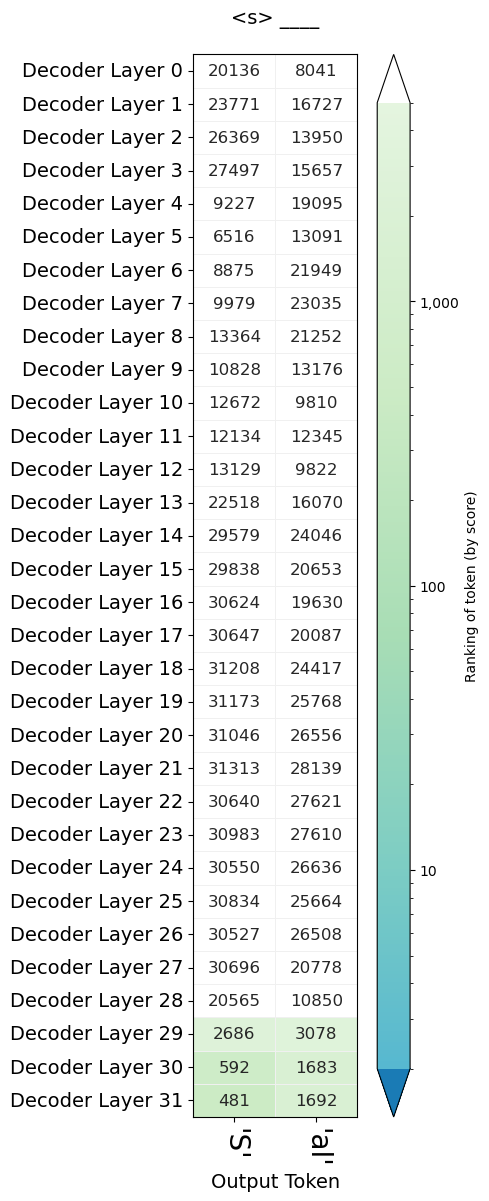

In [11]:
output2.rankings_watch( watch=[318, 389], position=7)

In [12]:

text= "The doctor was a"
output3 = lm.generate(text, generate=1, do_sample=True)


<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


<IPython.core.display.Javascript object>

In [13]:
# Find token ids for " man" and " woman"
lm.tokenizer(" man woman")

{'input_ids': [1, 28705, 676, 2971], 'attention_mask': [1, 1, 1, 1]}

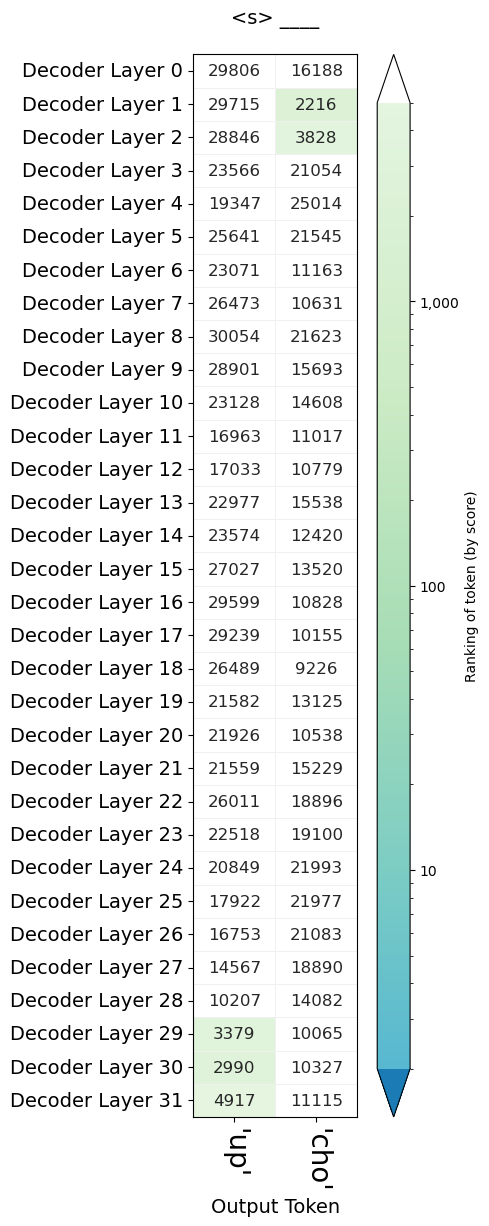

In [15]:
output3.rankings_watch(watch=[582, 2415], position=5)

In [ ]:
text= "The nurse was a"
output4 = lm.generate(text, generate=1, do_sample=False)

In [ ]:
output4.rankings_watch(watch=[582, 2415], position=4)